# Data Sience Project - Task 3  

In [3]:
import pandas as pd
from pandas import DataFrame
from sklearn import preprocessing
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from itertools import islice

#### Reading from csv to dataframe

In [38]:
df = pd.read_csv('hotels_data.csv')

In [39]:
df.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars
0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3
1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3
2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5
3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4
4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4


## 2.a

#### Get the 150 hotels with maximum records

In [40]:
groupedTopHotels = df.groupby(['Hotel Name']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(150)

In [41]:
groupedTopHotels.head()

,Hotel Name,counts
327,Newark Liberty International Airport Marriott,5346
194,Hilton Garden Inn Times Square,4892
374,Residence Inn Newark Elizabeth Liberty Interna...,4314
538,Westin New York at Times Square,3792
290,Loews Regency New York Hotel,3617


In [42]:
groupedTopHotels.count()

Hotel Name    150
counts        150
dtype: int64

#### Let's just take data from these hotels

In [43]:
df = df[df['Hotel Name'].isin(groupedTopHotels['Hotel Name'])]

## 2.b

#### Get the 40 checkin dates with maximum records

In [44]:

groupedTopDates = df.groupby(['Checkin Date']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(40)

In [45]:
groupedTopDates.head()

,Checkin Date,counts
64,11/11/2015 0:00,2302
36,10/14/2015 0:00,1887
86,11/4/2015 0:00,1885
151,8/19/2015 0:00,1883
51,10/28/2015 0:00,1861


In [46]:
groupedTopDates.count()

Checkin Date    40
counts          40
dtype: int64

#### Let's just take the data for those dates

In [47]:
df = df[df['Checkin Date'].isin(groupedTopDates['Checkin Date'])]

In [48]:
df.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars
2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5
4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4
7,1,7/17/2015 0:00,8/12/2015 0:00,5,1256,1183,1,5,Grand Hyatt New York,4
8,1,7/17/2015 0:00,8/13/2015 0:00,5,1256,1201,1,54,Grand Hyatt New York,4
29,1,7/17/2015 0:00,8/12/2015 0:00,5,3763,3378,1,39,Park Hyatt New York,5


## 2.c

#### For each Checkin date for a particular hotel we will take the lowest price (after discount) of all the snapshots of this hotel for that date Checkin (among different snapshot dates)

In [49]:
grouped_df =df.groupby(['Hotel Name','Checkin Date','Discount Code']).agg({'Discount Price': 'min'})

#### Data not found on specific dates for the specific hotel - We'll mark them as -1

In [50]:
# unstack data to get hotel and its 160 discount prices (40 checking dates * 4 Discount codes)
reduced_df = grouped_df.unstack(fill_value=-1).unstack(fill_value=-1).reset_index()
reduced_df.head()

Hotel Name Discount Price  \
Discount Code                                                      1   
Checkin Date                                          10/1/2015 0:00   
0                                        Aloft Harlem             -1   
1               Andaz 5th Avenue - a concept by Hyatt           2185   
2              Andaz Wall Street - a concept by Hyatt             -1   
3              Baccarat Hotel and Residences New York             -1   
4                                       Bentley Hotel             -1   

                                                                              \
Discount Code                                                                  
Checkin Date  10/14/2015 0:00 10/15/2015 0:00 10/16/2015 0:00 10/2/2015 0:00   
0                        1381              -1              -1             -1   
1                          -1            2495            2195           2145   
2                        1625              -1              -1             -1   
3                          -1              -1              -1             -1   
4                          -1              -1              -1             -1   

                                                                               \
Discount Code                                                                   
Checkin Date  10/21/2015 0:00 10/22/2015 0:00 10/27/2015 0:00 10/28/2015 0:00   
0                        1175              -1              -1            1537   
1                          -1            2066              -1            2116   
2                        1925            1750              -1            1670   
3                          -1              -1              -1              -1   
4                        1405              -1              -1              -1   

                   ...                                                    \
Discount Code      ...                   4                                 
Checkin Date       ...      8/26/2015 0:00 8/27/2015 0:00 8/28/2015 0:00   
0                  ...                  -1             -1            988   
1                  ...                  -1             -1             -1   
2                  ...                  -1             -1             -1   
3                  ...                  -1             -1             -1   
4                  ...                  -1             -1             -1   

                                                                           \
Discount Code                                                               
Checkin Date  9/10/2015 0:00 9/11/2015 0:00 9/16/2015 0:00 9/17/2015 0:00   
0                       1065             -1             -1             -1   
1                         -1             -1           2750           2885   
2                       1665             -1             -1             -1   
3                         -1             -1             -1             -1   
4                         -1             -1             -1             -1   

                                                           
Discount Code                                              
Checkin Date  9/18/2015 0:00 9/30/2015 0:00 9/9/2015 0:00  
0                         -1             -1            -1  
1                       2026             -1            -1  
2                       1855           2710            -1  
3                         -1             -1            -1  
4                         -1             -1            -1  

[5 rows x 161 columns]

In [51]:
reduced_df['Hotel Name'].count()

149

#### Find the hotels without records (in the top recorded dates) - ^ is XOR

In [52]:
hotelsWithoutRecords = set(groupedTopHotels['Hotel Name']) ^ set(reduced_df['Hotel Name'])

#### Add missing Hotel rows

In [53]:
hotelRow = [-1] * 161
for hotel in hotelsWithoutRecords:
    print(hotel)
    hotelRow[0] = hotel
    reduced_df = reduced_df.append(pd.Series(hotelRow,index=reduced_df.columns), ignore_index=True)
reduced_df.tail()

Embassy Suites Newark Airport


Hotel Name Discount Price  \
Discount Code                                                              1   
Checkin Date                                                  10/1/2015 0:00   
145                                  Wyndham Garden Chinatown             -1   
146            Wyndham Garden Long Island City Manhattan View             -1   
147                                        Wyndham New Yorker             -1   
148                               ink48 hotel a Kimpton Hotel           1436   
149                             Embassy Suites Newark Airport             -1   

                                                                              \
Discount Code                                                                  
Checkin Date  10/14/2015 0:00 10/15/2015 0:00 10/16/2015 0:00 10/2/2015 0:00   
145                        -1              -1              -1             -1   
146                        -1              -1              -1             -1   
147                        -1              -1              -1             -1   
148                        -1              -1              -1           1667   
149                        -1              -1              -1             -1   

                                                                               \
Discount Code                                                                   
Checkin Date  10/21/2015 0:00 10/22/2015 0:00 10/27/2015 0:00 10/28/2015 0:00   
145                        -1              -1              -1              -1   
146                        -1              -1              -1              -1   
147                        -1              -1              -1              -1   
148                        -1              -1              -1              -1   
149                        -1              -1              -1              -1   

                   ...                                                    \
Discount Code      ...                   4                                 
Checkin Date       ...      8/26/2015 0:00 8/27/2015 0:00 8/28/2015 0:00   
145                ...                  -1             -1             -1   
146                ...                  -1             -1             -1   
147                ...                  -1             -1             -1   
148                ...                  -1             -1           1084   
149                ...                  -1             -1             -1   

                                                                           \
Discount Code                                                               
Checkin Date  9/10/2015 0:00 9/11/2015 0:00 9/16/2015 0:00 9/17/2015 0:00   
145                       -1             -1             -1             -1   
146                       -1             -1             -1             -1   
147                       -1             -1             -1             -1   
148                       -1             -1             -1             -1   
149                       -1             -1             -1             -1   

                                                           
Discount Code                                              
Checkin Date  9/18/2015 0:00 9/30/2015 0:00 9/9/2015 0:00  
145                       -1             -1            -1  
146                       -1             -1            -1  
147                       -1             -1            -1  
148                       -1             -1            -1  
149                       -1             -1            -1  

[5 rows x 161 columns]

#### Check if the table size is the same as the first table

In [54]:
reduced_df['Hotel Name'].count()

150

## 2.d

#### Returns the minimum price for a given hotel - while ignoring the filled "-1" values:

In [80]:
# function that help us get the min without values -1
def getMinimumPrice(row):
    min_value = None
    for col in islice(reduced_df, 1, None): #reduced_df.iloc[:-1, :]:   
        if not min_value:
            min_value = row[col]
        elif row[col] < min_value and row[col] != -1:
            min_value = row[col]
    return min_value

#### Calculates the normelized price for a given price, 

In [81]:
def getNormalizedPrice(min_price, max_price, price):
    return (price - min_price) / (max_price - min_price) * 100

#### Getting all hotels max prices

In [82]:
max_prices = reduced_df.max(axis=1)

#### Setting default values for max, min, and normalized price

In [83]:
hotel_max = None
hotel_min = None
normalized = None

### Setting normalized prices' values for each hotel

In [84]:
for index, row in reduced_df.iterrows():
# getting current hotel's max and min prices
    hotel_max = max_prices[index]
    hotel_min = getMinimumPrice(row)
    for col in islice(reduced_df, 1, None):
        if (row[col] != -1):
            # saving the normalized price of eace of the hotel's prices
            normalized =(getNormalizedPrice(hotel_min,hotel_max,row[col])) 
            reduced_df.iloc[index, reduced_df.columns.get_loc(col)] = normalized

## 2.d

#### Debugging several values

In [60]:
reduced_df.head()

Hotel Name Discount Price  \
Discount Code                                                      1   
Checkin Date                                          10/1/2015 0:00   
0                                        Aloft Harlem       -1.00000   
1               Andaz 5th Avenue - a concept by Hyatt       52.71028   
2              Andaz Wall Street - a concept by Hyatt       -1.00000   
3              Baccarat Hotel and Residences New York       -1.00000   
4                                       Bentley Hotel       -1.00000   

                                                                              \
Discount Code                                                                  
Checkin Date  10/14/2015 0:00 10/15/2015 0:00 10/16/2015 0:00 10/2/2015 0:00   
0                   89.856957       -1.000000       -1.000000      -1.000000   
1                   -1.000000       72.024922       53.333333      50.218069   
2                   59.977868       -1.000000       -1.000000      -1.000000   
3                   -1.000000       -1.000000       -1.000000      -1.000000   
4                   -1.000000       -1.000000       -1.000000      -1.000000   

                                                                               \
Discount Code                                                                   
Checkin Date  10/21/2015 0:00 10/22/2015 0:00 10/27/2015 0:00 10/28/2015 0:00   
0                   76.462939       -1.000000            -1.0      100.000000   
1                   -1.000000       45.295950            -1.0       48.411215   
2                   71.043895       64.588713            -1.0       61.637772   
3                   -1.000000       -1.000000            -1.0       -1.000000   
4                   47.086403       -1.000000            -1.0       -1.000000   

                   ...                                                    \
Discount Code      ...                   4                                 
Checkin Date       ...      8/26/2015 0:00 8/27/2015 0:00 8/28/2015 0:00   
0                  ...                -1.0           -1.0      64.304291   
1                  ...                -1.0           -1.0      -1.000000   
2                  ...                -1.0           -1.0      -1.000000   
3                  ...                -1.0           -1.0      -1.000000   
4                  ...                -1.0           -1.0      -1.000000   

                                                                           \
Discount Code                                                               
Checkin Date  9/10/2015 0:00 9/11/2015 0:00 9/16/2015 0:00 9/17/2015 0:00   
0                  69.310793           -1.0      -1.000000      -1.000000   
1                  -1.000000           -1.0      87.912773      96.323988   
2                  61.453338           -1.0      -1.000000      -1.000000   
3                  -1.000000           -1.0      -1.000000      -1.000000   
4                  -1.000000           -1.0      -1.000000      -1.000000   

                                                           
Discount Code                                              
Checkin Date  9/18/2015 0:00 9/30/2015 0:00 9/9/2015 0:00  
0                  -1.000000           -1.0          -1.0  
1                  42.803738           -1.0          -1.0  
2                  68.461822          100.0          -1.0  
3                  -1.000000           -1.0          -1.0  
4                  -1.000000           -1.0          -1.0  

[5 rows x 161 columns]

## 2.f

#### Clustering the data with ward method and drawing a dendrogram

In [61]:
dist = linkage(reduced_df.iloc[:, 1:],'ward')
type(dist)
dist.shape

(149, 4)

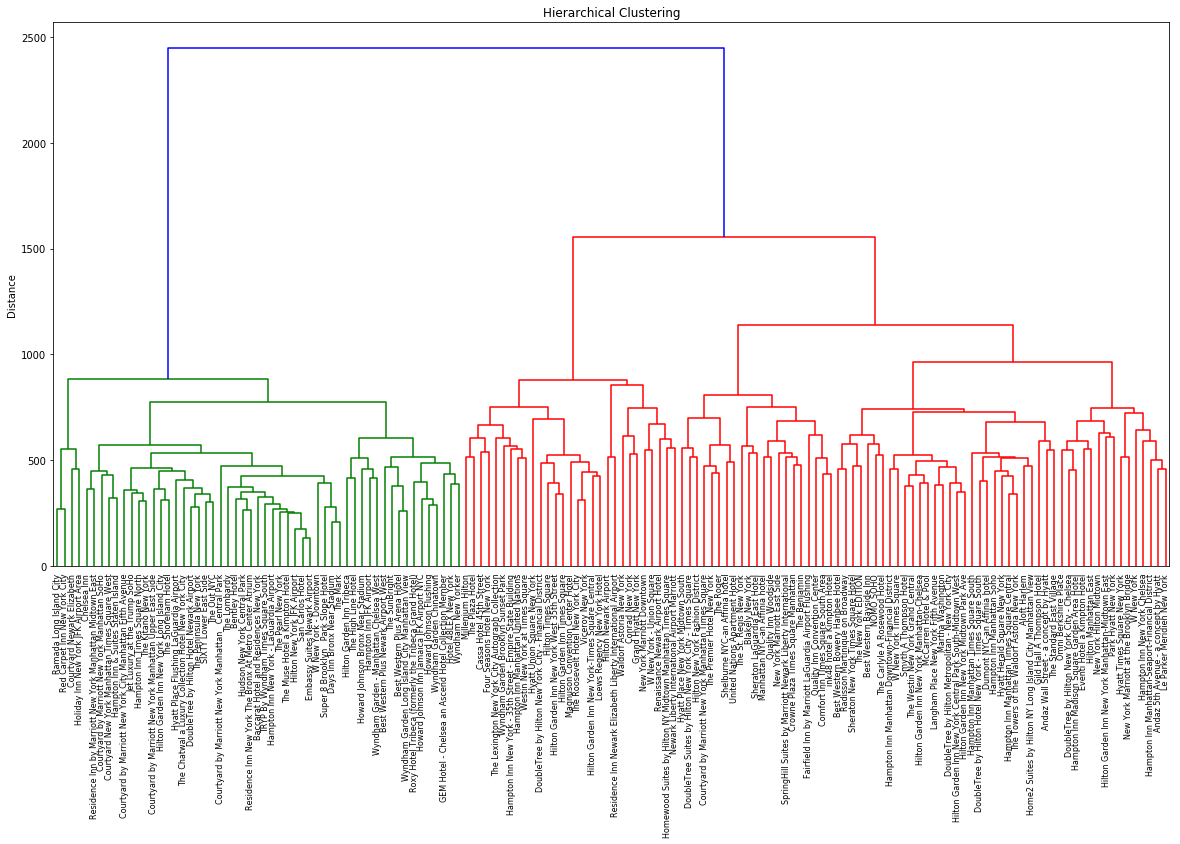

In [62]:

plt.figure(figsize=(20,10))
plt.title('Hierarchical Clustering')
plt.ylabel('Distance')
dendrogram(dist, labels=reduced_df['Hotel Name'].tolist(), leaf_rotation=90,leaf_font_size=8)
plt.show()

#### Getting the form flat clusters accroding to a specific threshold:

In [77]:
lbl = fcluster(dist,t=750,criterion='distance')
type(lbl)
print(lbl)

[10 11 10  2  2 10 10  3  3  8  4  2  9  6  2  1  2  2  2  7  2  9  2  7
 10  2 10 11  4 10 11  9  4  3 10  6  2  3 11 10 10 10 10  4 11  4  2 11
  2 10  2 10 11 10  4  4  4  3 11  7  2  5  4  1 10  6  3  3  3  3  2 10
  2  7 11  4  2 10 11  4  4  9 10 10  4 10 11  6  9 11  6 11 11  9  9 10
  1  1  6  2  5  2  3  2  2  7  8 10 10  9  2  2  9 10  2  3  2  4  2  2
  2 10  2  2  2  4  7  7  4  2  8 10  3 10 10  7  4 11  2  6 10  6  4  3
  4  3  3  3  9  2]


####  First, we wish to find the the biggest distance difference between two clades. Too big of a difference can be caused by commiting a merge of data which is not in the same cluster. This can be driven from the missing data - that was marked as -1.  

#### We can see that as bigger as we define the threshold - the less clusters we'll get:

In [79]:
lbl = fcluster(dist,t=2000,criterion='distance')
type(lbl)
print(lbl)

[2 2 2 1 1 2 2 1 1 2 2 1 2 2 1 1 1 1 1 2 1 2 1 2 2 1 2 2 2 2 2 2 2 1 2 2 1
 1 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 1 2 2 1 2 2 1 1 1 1 1 2 1 2
 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 1 1 1 1 2 2 2 2 2 1
 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 2 2 2 1 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 1 1 1
 2 1]


#### As smaller as we'll define the threshold, we'll get a bigger amount of clusters, this less distance between each one and better similarity.
